<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Explore-The-Dataset" data-toc-modified-id="Challenge-1---Explore-The-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Explore The Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-data-from-an-bird's-eye-view." data-toc-modified-id="Explore-the-data-from-an-bird's-eye-view.-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the data from an bird's-eye view.</a></span></li><li><span><a href="#Next,-evaluate-if-the-columns-in-this-dataset-are-strongly-correlated." data-toc-modified-id="Next,-evaluate-if-the-columns-in-this-dataset-are-strongly-correlated.-2.0.0.2"><span class="toc-item-num">2.0.0.2&nbsp;&nbsp;</span>Next, evaluate if the columns in this dataset are strongly correlated.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Remove-Column-Collinearity." data-toc-modified-id="Challenge-2---Remove-Column-Collinearity.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Remove Column Collinearity.</a></span></li><li><span><a href="#Challenge-3---Handle-Missing-Values" data-toc-modified-id="Challenge-3---Handle-Missing-Values-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Handle Missing Values</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-the-cells-below,-handle-the-missing-values-from-the-dataset.-Remember-to-comment-the-rationale-of-your-decisions." data-toc-modified-id="In-the-cells-below,-handle-the-missing-values-from-the-dataset.-Remember-to-comment-the-rationale-of-your-decisions.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.</a></span></li><li><span><a href="#Again,-examine-the-number-of-missing-values-in-each-column." data-toc-modified-id="Again,-examine-the-number-of-missing-values-in-each-column.-4.0.0.2"><span class="toc-item-num">4.0.0.2&nbsp;&nbsp;</span>Again, examine the number of missing values in each column.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Handle-WHOIS_*-Categorical-Data" data-toc-modified-id="Challenge-4---Handle-WHOIS_*-Categorical-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Handle <code>WHOIS_*</code> Categorical Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-the-cells-below,-fix-the-country-values-as-intructed-above." data-toc-modified-id="In-the-cells-below,-fix-the-country-values-as-intructed-above.-5.0.0.1"><span class="toc-item-num">5.0.0.1&nbsp;&nbsp;</span>In the cells below, fix the country values as intructed above.</a></span></li><li><span><a href="#If-a-limited-number-of-values-account-for-the-majority-of-data,-we-can-retain-these-top-values-and-re-label-all-other-rare-values." data-toc-modified-id="If-a-limited-number-of-values-account-for-the-majority-of-data,-we-can-retain-these-top-values-and-re-label-all-other-rare-values.-5.0.0.2"><span class="toc-item-num">5.0.0.2&nbsp;&nbsp;</span>If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.</a></span></li><li><span><a href="#After-verifying,-now-let's-keep-the-top-10-values-of-the-column-and-re-label-other-columns-with-OTHER." data-toc-modified-id="After-verifying,-now-let's-keep-the-top-10-values-of-the-column-and-re-label-other-columns-with-OTHER.-5.0.0.3"><span class="toc-item-num">5.0.0.3&nbsp;&nbsp;</span>After verifying, now let's keep the top 10 values of the column and re-label other columns with <code>OTHER</code>.</a></span></li><li><span><a href="#In-the-next-cell,-drop-['WHOIS_STATEPRO',-'WHOIS_REGDATE',-'WHOIS_UPDATED_DATE']." data-toc-modified-id="In-the-next-cell,-drop-['WHOIS_STATEPRO',-'WHOIS_REGDATE',-'WHOIS_UPDATED_DATE'].-5.0.0.4"><span class="toc-item-num">5.0.0.4&nbsp;&nbsp;</span>In the next cell, drop <code>['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']</code>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-5---Handle-Remaining-Categorical-Data-&amp;-Convert-to-Ordinal" data-toc-modified-id="Challenge-5---Handle-Remaining-Categorical-Data-&amp;-Convert-to-Ordinal-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Handle Remaining Categorical Data &amp; Convert to Ordinal</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#URL-is-easy.-We'll-simply-drop-it-because-it-has-too-many-unique-values-that-there's-no-way-for-us-to-consolidate." data-toc-modified-id="URL-is-easy.-We'll-simply-drop-it-because-it-has-too-many-unique-values-that-there's-no-way-for-us-to-consolidate.-6.0.0.1"><span class="toc-item-num">6.0.0.1&nbsp;&nbsp;</span><code>URL</code> is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.</a></span></li><li><span><a href="#Print-the-unique-value-counts-of-CHARSET.-You-see-there-are-only-a-few-unique-values.-So-we-can-keep-it-as-it-is." data-toc-modified-id="Print-the-unique-value-counts-of-CHARSET.-You-see-there-are-only-a-few-unique-values.-So-we-can-keep-it-as-it-is.-6.0.0.2"><span class="toc-item-num">6.0.0.2&nbsp;&nbsp;</span>Print the unique value counts of <code>CHARSET</code>. You see there are only a few unique values. So we can keep it as it is.</a></span></li><li><span><a href="#Before-you-think-of-your-own-solution,-don't-read-the-instructions-that-come-next." data-toc-modified-id="Before-you-think-of-your-own-solution,-don't-read-the-instructions-that-come-next.-6.0.0.3"><span class="toc-item-num">6.0.0.3&nbsp;&nbsp;</span>Before you think of your own solution, don't read the instructions that come next.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-6---Modeling,-Prediction,-and-Evaluation" data-toc-modified-id="Challenge-6---Modeling,-Prediction,-and-Evaluation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Modeling, Prediction, and Evaluation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-this-lab,-we-will-try-two-different-models-and-compare-our-results." data-toc-modified-id="In-this-lab,-we-will-try-two-different-models-and-compare-our-results.-7.0.0.1"><span class="toc-item-num">7.0.0.1&nbsp;&nbsp;</span>In this lab, we will try two different models and compare our results.</a></span></li><li><span><a href="#Our-second-algorithm-is-is-DecisionTreeClassifier" data-toc-modified-id="Our-second-algorithm-is-is-DecisionTreeClassifier-7.0.0.2"><span class="toc-item-num">7.0.0.2&nbsp;&nbsp;</span>Our second algorithm is is DecisionTreeClassifier</a></span></li><li><span><a href="#We'll-create-another-DecisionTreeClassifier-model-with-max_depth=5." data-toc-modified-id="We'll-create-another-DecisionTreeClassifier-model-with-max_depth=5.-7.0.0.3"><span class="toc-item-num">7.0.0.3&nbsp;&nbsp;</span>We'll create another DecisionTreeClassifier model with max_depth=5.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Bonus-Challenge---Feature-Scaling" data-toc-modified-id="Bonus-Challenge---Feature-Scaling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge - Feature Scaling</a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [238]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sb
import matplotlib.pyplot as plt

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

Your features will be:

+ URL: it is the anonymous identification of the URL analyzed in the study
+ URL_LENGTH: it is the number of characters in the URL
+ NUMBER_SPECIAL_CHARACTERS: it is number of special characters identified in the URL, such as, “/”, “%”, “#”, “&”, “. “, “=”
+ CHARSET: it is a categorical value and its meaning is the character encoding standard (also called character set).
+ SERVER: it is a categorical value and its meaning is the operative system of the server got from the packet response.
+ CONTENT_LENGTH: it represents the content size of the HTTP header.
+ WHOIS_COUNTRY: it is a categorical variable, its values are the countries we got from the server response (specifically, our script used the API of Whois).
+ WHOIS_STATEPRO: it is a categorical variable, its values are the states we got from the server response (specifically, our script used the API of Whois).
+ WHOIS_REGDATE: Whois provides the server registration date, so, this variable has date values with format DD/MM/YYY HH:MM
+ WHOIS_UPDATED_DATE: Through the Whois we got the last update date from the server analyzed
+ TCP_CONVERSATION_EXCHANGE: This variable is the number of TCP packets exchanged between the server and our honeypot client
+ DIST_REMOTE_TCP_PORT: it is the number of the ports detected and different to TCP
+ REMOTE_IPS: this variable has the total number of IPs connected to the honeypot
+ APP_BYTES: this is the number of bytes transfered
+ SOURCE_APP_PACKETS: packets sent from the honeypot to the server
+ REMOTE_APP_PACKETS: packets received from the server
+ APP_PACKETS: this is the total number of IP packets generated during the communication between the honeypot and the server
+ DNS_QUERY_TIMES: this is the number of DNS packets generated during the communication between the honeypot and the server
+ TYPE: this is a categorical variable, its values represent the type of web page analyzed, specifically, 1 is for malicious websites and 0 is for benign websites

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:


*Source: [kaggle](https://www.kaggle.com/viratkothari/malicious-and-benign-websites-classification)*

In [239]:
web_df = pd.read_csv('../website.csv')


#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [240]:
# What the dataset looks like?
web_df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [241]:
# Further exploration of the dataset
web_df.describe(include='all')

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781,1781.000000,1781.000000,1774,1605,969.000000,1475,1419,1654,1642,...,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
unique,1781,NaN,NaN,8,238,NaN,48,181,890,593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M0_109,NaN,NaN,UTF-8,Apache,NaN,US,CA,17/09/2008 0:00,2/09/2016 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,676,386,NaN,1103,372,62,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,56.961258,11.111735,NaN,NaN,11726.927761,NaN,NaN,NaN,NaN,...,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,NaN,27.555586,4.549896,NaN,NaN,36391.809051,NaN,NaN,NaN,NaN,...,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,NaN,16.000000,5.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,NaN,39.000000,8.000000,NaN,NaN,324.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,NaN,49.000000,10.000000,NaN,NaN,1853.000000,NaN,NaN,NaN,NaN,...,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,NaN,68.000000,13.000000,NaN,NaN,11323.000000,NaN,NaN,NaN,NaN,...,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000


In [242]:
# What are the data types?
web_df.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [243]:
# Which columns contain the features of the websites?
"""
All but the "Type" column. More specifically from "SERVER" to "DNS_QUERY" as the first 4, "URL", "URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS" and
"CHARSET" are about the URL (Which could still be useful)
Me may probably drop "URL" column, as it's an unique anonymous identifier which doesn't give any useful information.
"""

'\nAll but the "Type" column. More specifically from "SERVER" to "DNS_QUERY" as the first 4, "URL", "URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS" and\n"CHARSET" are about the URL (Which could still be useful)\nMe may probably drop "URL" column, as it\'s an unique anonymous identifier which doesn\'t give any useful information.\n'

In [244]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
"""
The "Type Column. '0' is for bening websites and '1' for the malicious ones.
"""

'\nThe "Type Column. \'0\' is for bening websites and \'1\' for the malicious ones.\n'

In [245]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?
"""
"SERVER", "WHOIS_COUNTRY", and to a lesser extent, "WHOIS_STATEPRO" could be transformed to ordinal values.
As they could be prove useful when determining if a website is malicious.
(i.e: Some countries may prove to be more akin to host malicious websites)
"""

'\n"SERVER", "WHOIS_COUNTRY", and to a lesser extent, "WHOIS_STATEPRO" could be transformed to ordinal values.\nAs they could be prove useful when determining if a website is malicious.\n(i.e: Some countries may prove to be more akin to host malicious websites)\n'

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

"\nI may remove NUMBER_SPECIAL_CHARACTERS as it's strongly correlated with URL_LENGTH. But both may still be usefull.\nI will keep APP_PACKETS and drop TCP_COVNERSATION_EXCHANGE, SOURCE_APP_PACKETS and REMOTE_APP_PACKETS as their correlation is close to 1.0.\nI will keep REMOTE_APP_BYTES and drop APP_BYTES as their correlation is close to 1.0.\n"

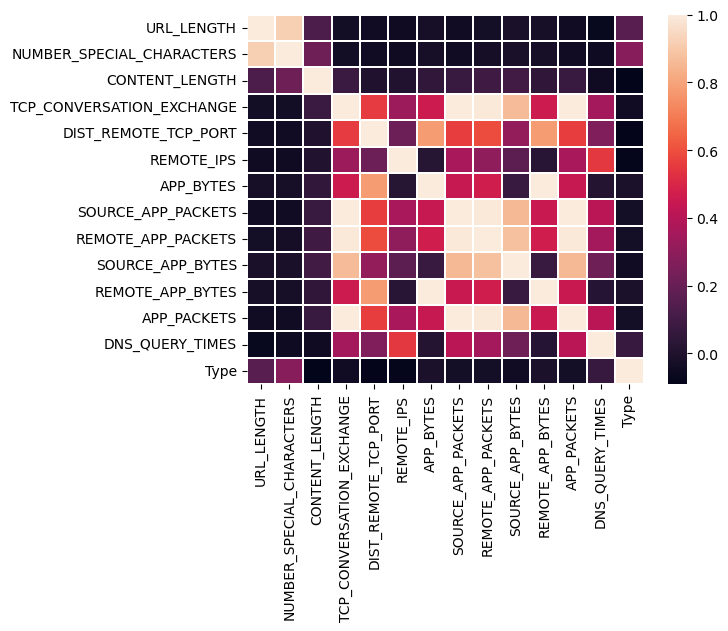

In [246]:
# Removing URL since it's an unique anonymous identifier
web_features_temp = web_df[[c for c in web_df.columns if c != "URL"]]

# Creating the correlation matrix and visualizing it through a heat map.
corr_mtx = web_features_temp.corr(method='pearson', numeric_only=True)
sb.heatmap(corr_mtx, linewidths=.1, linecolor='white')

"""
I may remove NUMBER_SPECIAL_CHARACTERS as it's strongly correlated with URL_LENGTH. But both may still be usefull.
I will keep APP_PACKETS and drop TCP_COVNERSATION_EXCHANGE, SOURCE_APP_PACKETS and REMOTE_APP_PACKETS as their correlation is close to 1.0.
I will keep REMOTE_APP_BYTES and drop APP_BYTES as their correlation is close to 1.0.
"""

### This is an example to know the feature importance using a ML model

In [247]:
#! pip install xgboost
import xgboost as xgb

In [248]:
# Defining Features and Target
X = web_df._get_numeric_data().drop('Type', axis=1)
y = web_df.Type

# Splitting the data into train and test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [249]:
# Initializing and training the model
bst = xgb.XGBClassifier().fit(X_train,y_train)

In [250]:
sort_idx = bst.feature_importances_.argsort()

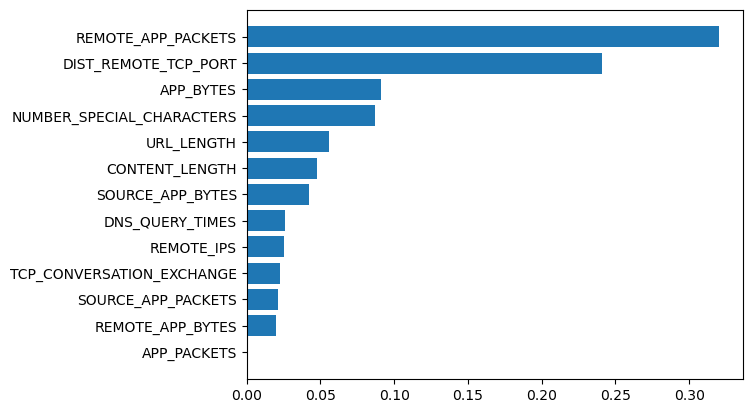

In [251]:
plt.barh(X.columns[sort_idx],bst.feature_importances_[sort_idx])
plt.show();

    In the previous plot we can see the features with lower weight in the dataset.

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

<Axes: >

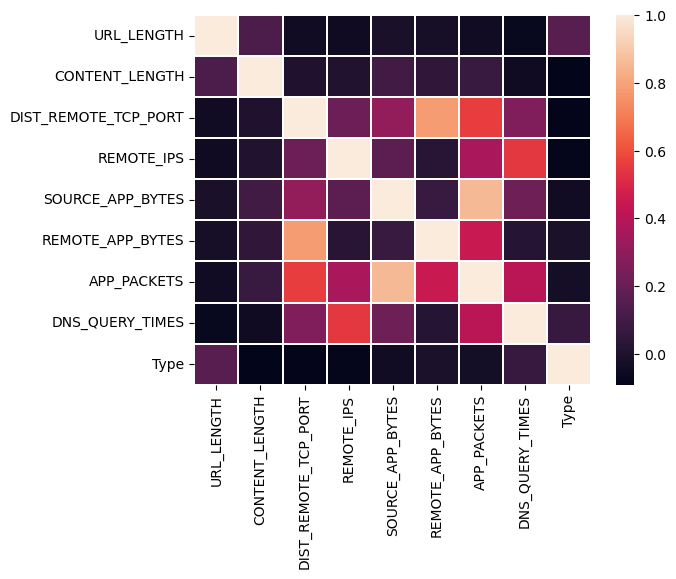

In [252]:
# Removing the colums with high correlation
web_features_corr = web_features_temp[[c for c in web_features_temp.columns if
    c != "NUMBER_SPECIAL_CHARACTERS" and
    c != "APP_BYTES" and
    c != "SOURCE_APP_PACKETS" and
    c != "REMOTE_APP_PACKETS" and
    c != "TCP_CONVERSATION_EXCHANGE"]]

# Creating the correlation matrix and visualizing it through a heat map.
corr_mtx = web_features_corr.corr(method='pearson', numeric_only=True)
sb.heatmap(corr_mtx, linewidths=.1, linecolor='white')

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [253]:
print(f"Missing values in each column:\n{web_features_corr.isnull().sum()}")

Missing values in each column:
URL_LENGTH                0
CHARSET                   7
SERVER                  176
CONTENT_LENGTH          812
WHOIS_COUNTRY           306
WHOIS_STATEPRO          362
WHOIS_REGDATE           127
WHOIS_UPDATED_DATE      139
DIST_REMOTE_TCP_PORT      0
REMOTE_IPS                0
SOURCE_APP_BYTES          0
REMOTE_APP_BYTES          0
APP_PACKETS               0
DNS_QUERY_TIMES           1
Type                      0
dtype: int64


In [254]:
# Firts we will drop the columns with more than 50% of missing data
webf_miss50 = web_features_corr.dropna(axis='columns', thresh=web_features_corr.shape[0]/2)

In [255]:
# Now we will drop the rows with missing data
webf_no_missing = webf_miss50.dropna(axis='index')

#### Again, examine the number of missing values in each column. 

    If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [256]:
# Examine missing values in each column
print(f"Missing values in each column:\n{webf_no_missing.isnull().sum()}")

Missing values in each column:
URL_LENGTH              0
CHARSET                 0
SERVER                  0
CONTENT_LENGTH          0
WHOIS_COUNTRY           0
WHOIS_STATEPRO          0
WHOIS_REGDATE           0
WHOIS_UPDATED_DATE      0
DIST_REMOTE_TCP_PORT    0
REMOTE_IPS              0
SOURCE_APP_BYTES        0
REMOTE_APP_BYTES        0
APP_PACKETS             0
DNS_QUERY_TIMES         0
Type                    0
dtype: int64


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [257]:
webf_no_missing.WHOIS_COUNTRY.unique()

array(['US', 'RU', 'AU', 'CA', 'PA', 'GB', "[u'GB'; u'UK']", 'IN', 'UG',
       'JP', 'UK', 'SI', 'AT', 'CN', 'KY', 'TR', 'SC', 'NL', 'UA', 'CH',
       'HK', 'IL', 'DE', 'IT', 'BS', 'NO', 'us', 'BE', 'BY', 'AE', 'IE',
       'PH', 'UY'], dtype=object)

In [258]:
# Replacing the duplicated country values left as instructed
webf_no_missing["WHOIS_COUNTRY"].replace(
    {'us':'US',"[u'GB'; u'UK']":'UK'}, inplace=True)

C:\Users\Javi\AppData\Local\Temp\ipykernel_87564\3633595437.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  webf_no_missing["WHOIS_COUNTRY"].replace(
C:\Users\Javi\AppData\Local\Temp\ipykernel_87564\3633595437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  webf_no_missing["WHOIS_COUNTRY"].replace(


Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

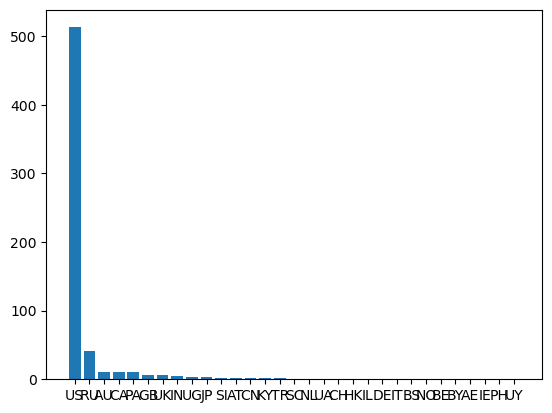

In [259]:
plt.bar(webf_no_missing.WHOIS_COUNTRY.unique(), webf_no_missing.WHOIS_COUNTRY.value_counts().values)
plt.show();

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [260]:
# Identifying the top 10 in WHOIS_COUNTRY
top_10 = webf_no_missing["WHOIS_COUNTRY"].value_counts().nlargest(10).index

# Renaming the rest of the values to "OTHER"
webf_no_missing['WHOIS_COUNTRY'] = webf_no_missing['WHOIS_COUNTRY'].apply(
    lambda x: x if x in top_10 else 'OTHER')

C:\Users\Javi\AppData\Local\Temp\ipykernel_87564\1075634775.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  webf_no_missing['WHOIS_COUNTRY'] = webf_no_missing['WHOIS_COUNTRY'].apply(


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [261]:
# Dropping unnedded columns
webf = webf_no_missing.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis='columns')

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [262]:
webf.dtypes

URL_LENGTH                int64
CHARSET                  object
SERVER                   object
CONTENT_LENGTH          float64
WHOIS_COUNTRY            object
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
SOURCE_APP_BYTES          int64
REMOTE_APP_BYTES          int64
APP_PACKETS               int64
DNS_QUERY_TIMES         float64
Type                      int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [263]:
# I already dropped URL for this same reason up in the code, at the beginning

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [264]:
print(webf.CHARSET.value_counts())

CHARSET
UTF-8           200
ISO-8859-1      169
utf-8           108
us-ascii         92
iso-8859-1       66
windows-1251      1
Name: count, dtype: int64


`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [265]:
# Replacing the values with a simplified version based on whether they contain the keywords
#  "Microsoft", "Apache", "nginx" and renaming the rest to "OTHER"

webf['SERVER'] = np.where(webf['SERVER'].str.contains('Microsoft', case=False), 'Microsoft',
                np.where(webf['SERVER'].str.contains('Apache', case=False), 'Apache',
                np.where(webf['SERVER'].str.contains('nginx', case=False), 'nginx',
                                                                        'OTHER')))
print(webf['SERVER'].value_counts())

SERVER
Apache       298
Microsoft    127
OTHER        108
nginx        103
Name: count, dtype: int64


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [266]:
website_dummy = pd.get_dummies(webf, drop_first=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [267]:
website_dummy.head()

,URL_LENGTH,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,CHARSET_UTF-8,...,WHOIS_COUNTRY_AU,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CH,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
3,17,162.0,22,3,18784,4380,39,8.0,0,False,...,False,False,False,False,False,False,False,False,False,True
6,18,345.0,0,3,8559,1327,14,2.0,0,False,...,False,False,False,False,False,False,False,False,False,True
7,19,324.0,0,0,0,0,0,0.0,0,False,...,False,False,False,False,False,False,False,False,False,True
11,20,324.0,0,0,0,0,0,0.0,0,False,...,False,False,False,False,False,False,False,False,False,True
16,21,686.0,0,2,1580,745,8,2.0,1,False,...,False,False,False,False,False,False,True,False,False,False


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [268]:
# Splitting the data into features and target
web_df_target = website_dummy["Type"]
web_df_features = website_dummy.drop(["Type"], axis='columns')

# Splitting the data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split( website_dummy, web_df_target, test_size=0.2, random_state=4)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [269]:
from sklearn.linear_model import LogisticRegression

# Initializing the model
web_model_lr = LogisticRegression(C=0.01, solver='liblinear')

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [270]:
# Training the model with the data
web_model_lr.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [271]:
from sklearn.metrics import confusion_matrix, accuracy_score

def draw_confusion(y_test,y_pred,labels):

    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm)
    plt.title('Confusion matrix',size=16)
    tick_marks = np.arange(len(labels))
    ax.set_xticklabels([''] + labels, size=12)
    ax.set_yticklabels([''] + labels, size=12)
    plt.ylabel('Predicted',size=14)
    plt.xlabel('True',size=14)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(6,6)
    plt.show()


In [272]:
y_pred = web_model_lr.predict(X_test)

accuracy_score(y_test, y_pred)

0.9609375

C:\Users\Javi\AppData\Local\Temp\ipykernel_87564\2453193257.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels, size=12)
C:\Users\Javi\AppData\Local\Temp\ipykernel_87564\2453193257.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels, size=12)


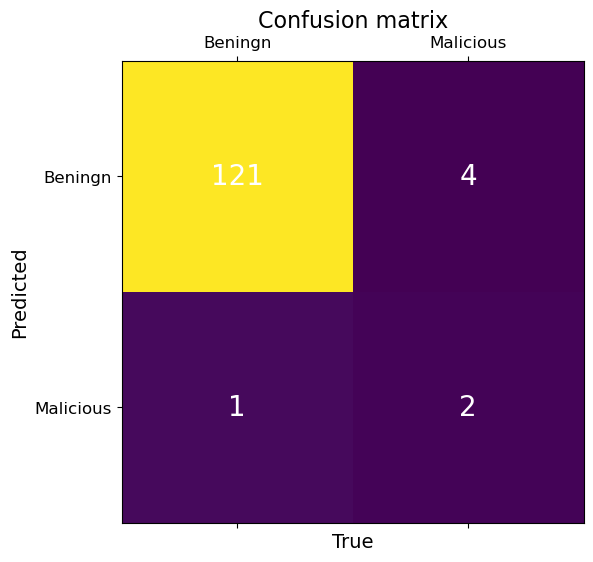

In [273]:
# Compute and Plot confusion matrix
draw_confusion(y_test, y_pred, ['Beningn','Malicious'])

What are your thoughts on the performance of the model? Write your conclusions below.

### Your conclusions here:
    I'd say the model is working pretty good, with an accuracy rating of 0.96 and only 5 false positives/negatives

#### Our second algorithm is is DecisionTreeClassifier

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `DecisionTreeClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where max_depth=3

In [195]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit the model
web_model_dtr = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

To test your model, compute the predicted probabilities, decide 0 or 1 using a threshold of 0.5 and print the confusion matrix as well as the accuracy score (on the test set!)

1.0


C:\Users\Javi\AppData\Local\Temp\ipykernel_87564\2453193257.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels, size=12)
C:\Users\Javi\AppData\Local\Temp\ipykernel_87564\2453193257.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels, size=12)


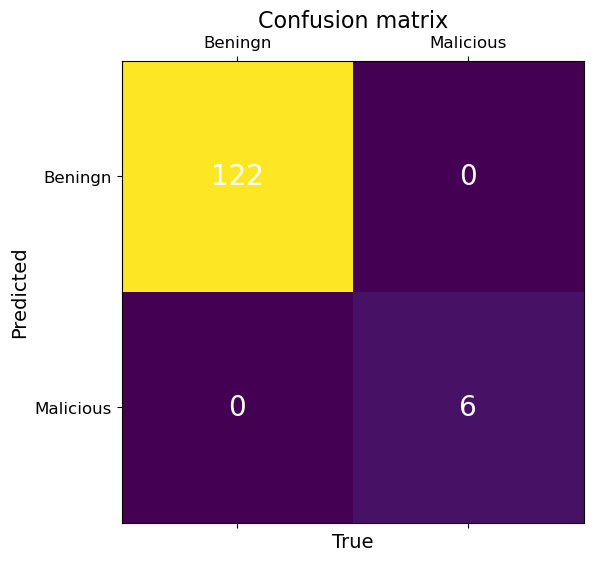

In [196]:
#Make Predictions and print the accuracy score
y_pred_dtr = web_model_dtr.predict(X_test)
# Apply threshold to get binary labels
y_pred_dtr = np.where(y_pred_dtr >= 0.5, 1, 0)

print(accuracy_score(y_test, y_pred_dtr))

# Compute and Plot confusion matrix
draw_confusion(y_test, y_pred_dtr, ['Beningn','Malicious'])


#### We'll create another DecisionTreeClassifier model with max_depth=5. 
Initialize and fit the model below and print the confusion matrix and the accuracy score.

1.0


C:\Users\Javi\AppData\Local\Temp\ipykernel_87564\2453193257.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels, size=12)
C:\Users\Javi\AppData\Local\Temp\ipykernel_87564\2453193257.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels, size=12)


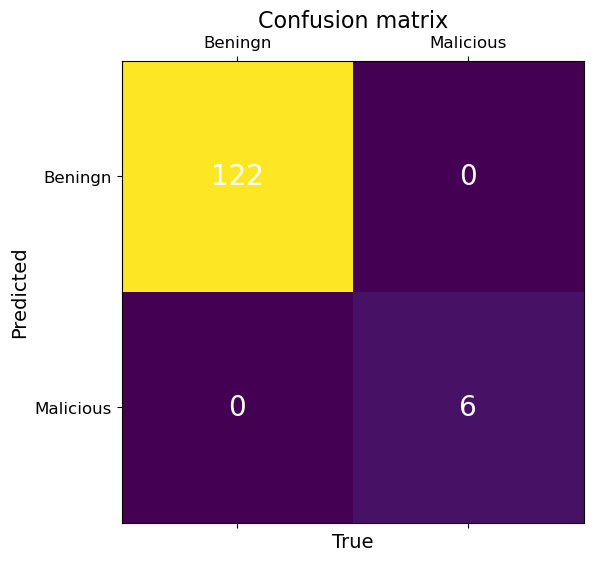

In [197]:
# Initialize and fit the model
web_model_dtr_5 = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)

#Make Predictions and print the accuracy score
y_pred_dtr5 = web_model_dtr.predict(X_test)
print(accuracy_score(y_test, y_pred_dtr5))

# Compute and Plot confusion matrix
draw_confusion(y_test, y_pred_dtr5, ['Beningn','Malicious'])


Did you see an improvement in the confusion matrix when increasing max_depth to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

### Your conclusions here:
There was no improvement with max_depth = 5 over usingmax_depth = 3. Both models seem perfect, with 1.0 accuracy. Which is an improvement over using the logistic regression model

<!-- Add your conclusion here -->

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here

## Comments:

Add your comments here: